<a href="https://colab.research.google.com/github/tejaswinirb1/ML_observations/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('testdata.csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [ ]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

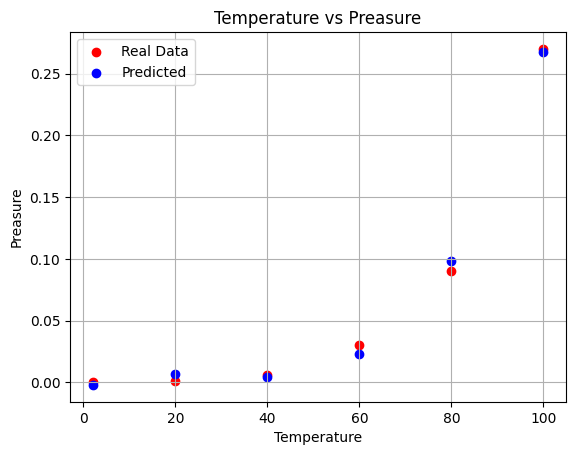

In [ ]:
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(temperature) #Transforming the input data into polynomial features
linreg = LinearRegression()
linreg.fit(X_poly, preasure) #Fitting the model with the transformed data
#Predicting the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

#Visualising the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted_preasure, color='blue')
plt.title('Temperature vs Preasure')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

Activity to do:
1. Run the code by changing the value of degree variable and observe the plot and write the observation
2. Implement on Auto MPG Dataset

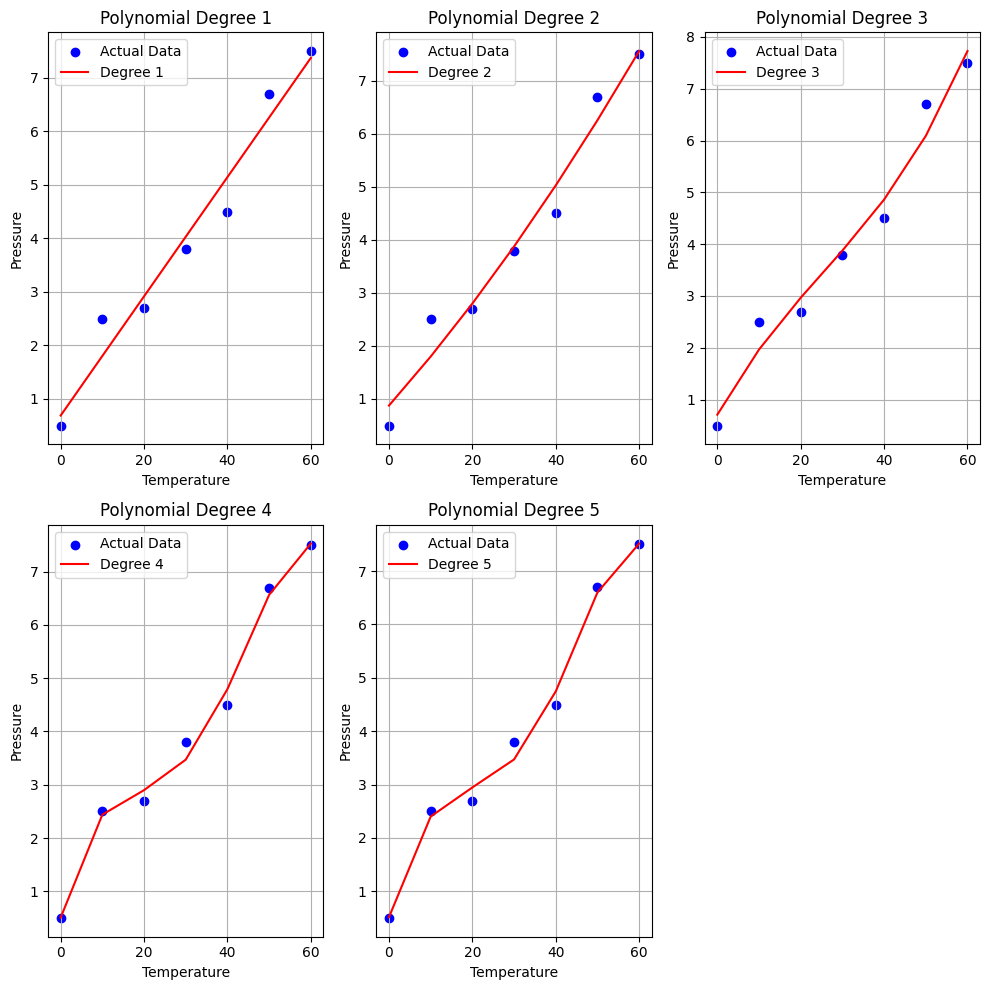

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data (e.g., Temperature vs Pressure)
x = np.array([0, 10, 20, 30, 40, 50, 60]).reshape(-1, 1)
y = np.array([0.5, 2.5, 2.7, 3.8, 4.5, 6.7, 7.5])

# Degrees to compare
degrees = [1, 2, 3, 4, 5]

plt.figure(figsize=(10,10))

for i, degree in enumerate(degrees, start=1):
    # Transform to polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Fit model
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)

    # Plotting
    plt.subplot(2, 3, i)
    plt.scatter(x, y, color='blue', label='Actual Data')
    plt.plot(x, y_pred, color='red', label=f'Degree {degree}')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('Temperature')
    plt.ylabel('Pressure')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


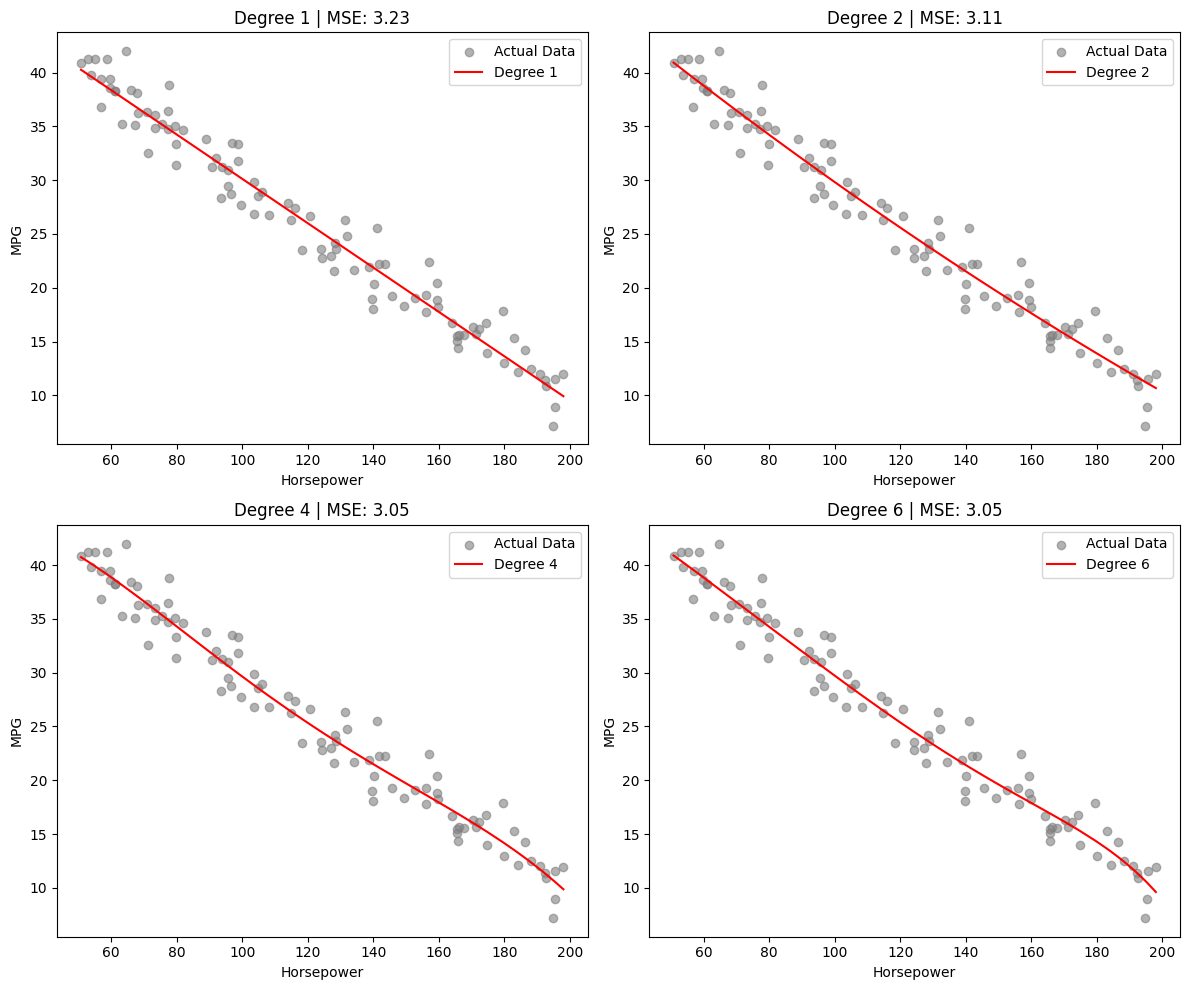

{1: 3.2263382558682134,
 2: 3.1087746654009463,
 4: 3.0541547128837543,
 6: 3.047861366712586}

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Create synthetic Auto MPG dataset
np.random.seed(42)
horsepower = np.random.uniform(50, 200, 100)
mpg = 50 - (horsepower * 0.2) + np.random.normal(0, 2, 100)

auto_df = pd.DataFrame({
    'horsepower': horsepower,
    'mpg': mpg
})

X = auto_df[['horsepower']].values
y = auto_df['mpg'].values

degrees = [1, 2, 4, 6]
results = {}

plt.figure(figsize=(12, 10))
for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    results[degree] = mse

    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')
    sorted_idx = X[:, 0].argsort()
    plt.plot(X[sorted_idx], y_pred[sorted_idx], color='red', label=f'Degree {degree}')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.title(f'Degree {degree} | MSE: {mse:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

results
